In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
data = pd.read_csv("Ads_CTR_Optimisation.csv")

In [40]:
#implementing UCB

import math
N = 10000
d=10
ads_selected = []
number_of_selections = [0]*d
number_of_rewards = [0]*d
total_rewards = 0

for n in range(0, N):
    ad = 0
    max_upperbound = 0
    for i in range(0, d):
        if number_of_selections[i]>0:
            average_reward = number_of_rewards[i]/number_of_selections[i]
            confidence_interval = math.sqrt(3/2 * math.log(n+1)/number_of_selections[i]) #n+1 because the value of log0 = infinity
            upperbound = average_reward + confidence_interval
        else:
            upperbound = 1e400  #setting the upper confiednce bound too high so that every ad is selected at least once
        if upperbound>max_upperbound:
            max_upperbound = upperbound
            ad = i
    ads_selected.append(ad)
    number_of_selections[ad] += 1
    reward = data.values[n, ad]
    number_of_rewards[ad] += reward
    total_rewards += reward
    
            
#in each round(n) ucb is calculating the ucb and selecting the ad with maximun upper bound     


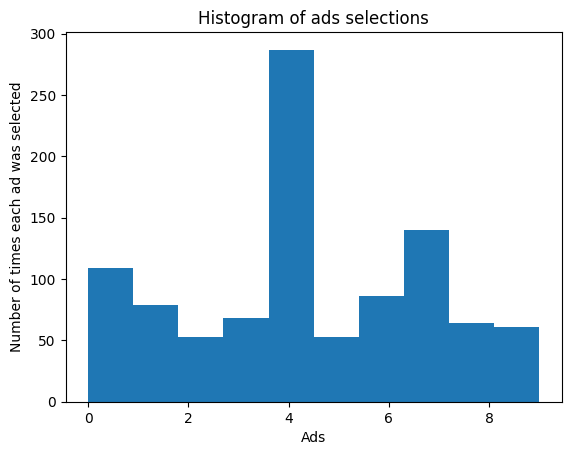

In [37]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

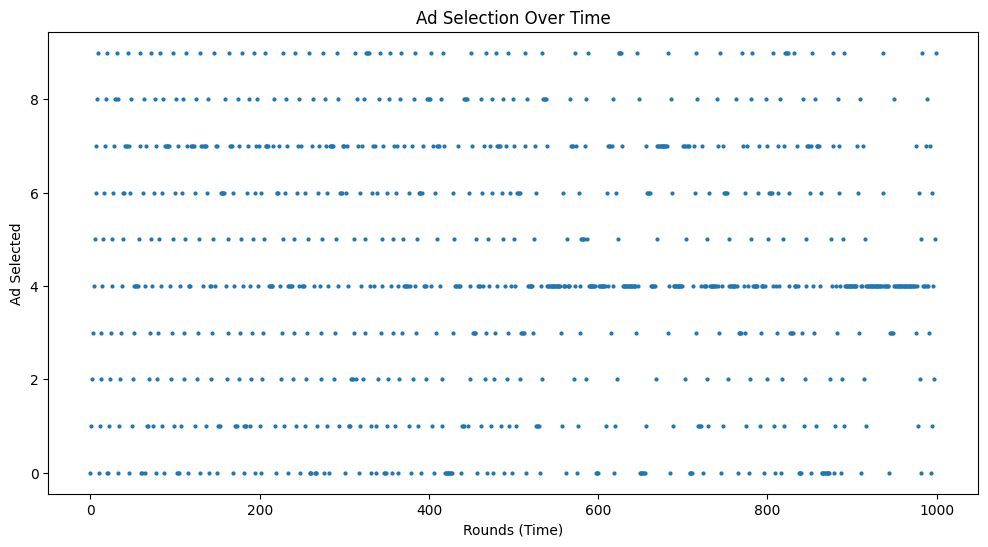

In [38]:
plt.figure(figsize=(12,6))
plt.plot(range(len(ads_selected)), ads_selected, marker='o', linestyle='None', markersize=2)
plt.xlabel("Rounds (Time)")
plt.ylabel("Ad Selected")
plt.title("Ad Selection Over Time")
plt.show()

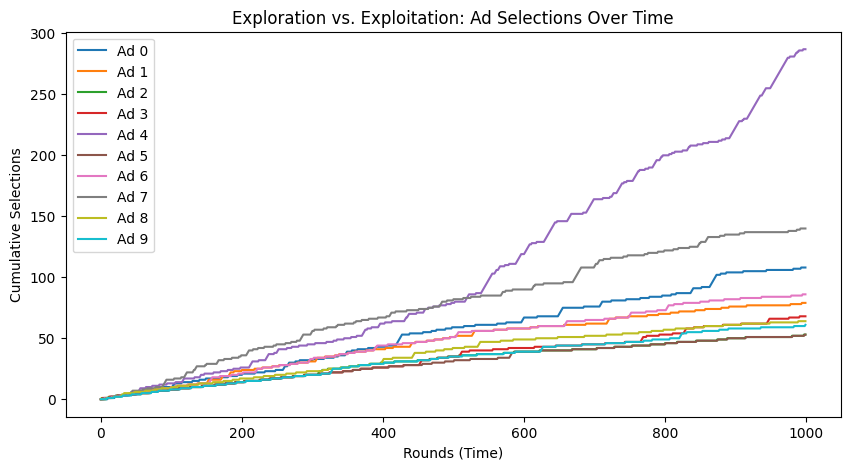

In [39]:
# 1️⃣ Cumulative number of times each ad was selected over time
cumulative_selections = np.zeros((d, N))

for t in range(1, N):
    cumulative_selections[:, t] = cumulative_selections[:, t - 1]
    cumulative_selections[ads_selected[t], t] += 1

plt.figure(figsize=(10, 5))
for i in range(d):
    plt.plot(range(N), cumulative_selections[i], label=f'Ad {i}')
plt.xlabel("Rounds (Time)")
plt.ylabel("Cumulative Selections")
plt.title("Exploration vs. Exploitation: Ad Selections Over Time")
plt.legend()
plt.show()